In [1]:
import pandas as pd

In [2]:
pref = pd.read_csv("COVID-19-jp/nhk_news_covid19_prefectures_daily_data.csv")
pref["日付"] = pd.to_datetime(pref["日付"] )
print(len(pref))
pref.tail()

22184


,日付,都道府県コード,都道府県名,各地の感染者数_1日ごとの発表数,各地の感染者数_累計,各地の死者数_1日ごとの発表数,各地の死者数_累計
22179,2021-04-27,47,沖縄県,86,12265,1,134
22180,2021-04-28,47,沖縄県,63,12328,0,134
22181,2021-04-29,47,沖縄県,76,12404,0,134
22182,2021-04-30,47,沖縄県,59,12463,2,136
22183,2021-05-01,47,沖縄県,105,12568,1,137


In [3]:
all_jp = pref.groupby(["都道府県名"], as_index=False).sum()
del all_jp["都道府県コード"]
del all_jp["各地の感染者数_累計"]
del all_jp["各地の死者数_累計"]
#all_jp = all_jp.rename(columns={"各地の感染者数合計":"各地の感染者数_1日ごとの発表数"})
all_jp = all_jp.rename(columns={"各地の感染者数_1日ごとの発表数":"各地の感染者数合計"})
all_jp.tail()

,都道府県名,各地の感染者数合計,各地の死者数_1日ごとの発表数
42,静岡県,6496,121
43,香川県,1281,22
44,高知県,1052,20
45,鳥取県,374,2
46,鹿児島県,2183,28


## 人口データを付与

In [4]:
pop = pd.read_excel("COVID-19-jp/2001stjin.xls",header=3)[["Unnamed: 1","計"]]
pop.rename(columns={"Unnamed: 1":"都道府県名"},inplace=True)
pop.rename(columns={"計":"人口"},inplace=True)
pop = pop.loc[pop["都道府県名"]!="合計"].reset_index(drop=True)
pop.head()

,都道府県名,人口
0,北海道,5267762
1,青森県,1275783
2,岩手県,1235517
3,宮城県,2292385
4,秋田県,985416


In [5]:
all_jp = pd.merge(all_jp, pop, on="都道府県名", how="left")
all_jp.head()

,都道府県名,各地の感染者数合計,各地の死者数_1日ごとの発表数,人口
0,三重県,3814,82,1813859
1,京都府,12672,187,2545899
2,佐賀県,1630,13,823810
3,兵庫県,32043,690,5549568
4,北海道,24350,861,5267762


## 人口当たりの感染者数

In [6]:
all_jp["１万人当たりの感染者数"] = all_jp["各地の感染者数合計"] / (all_jp["人口"] / 10000)

## グラフ化

In [7]:
import matplotlib.pyplot as plt
%matplotlib notebook
#%matplotlib inline

In [8]:
all_jp_desc = all_jp.sort_values(["各地の感染者数合計"],ascending=False)
all_jp_desc_10k = all_jp.sort_values(["１万人当たりの感染者数"],ascending=False)


<IPython.core.display.Javascript object>


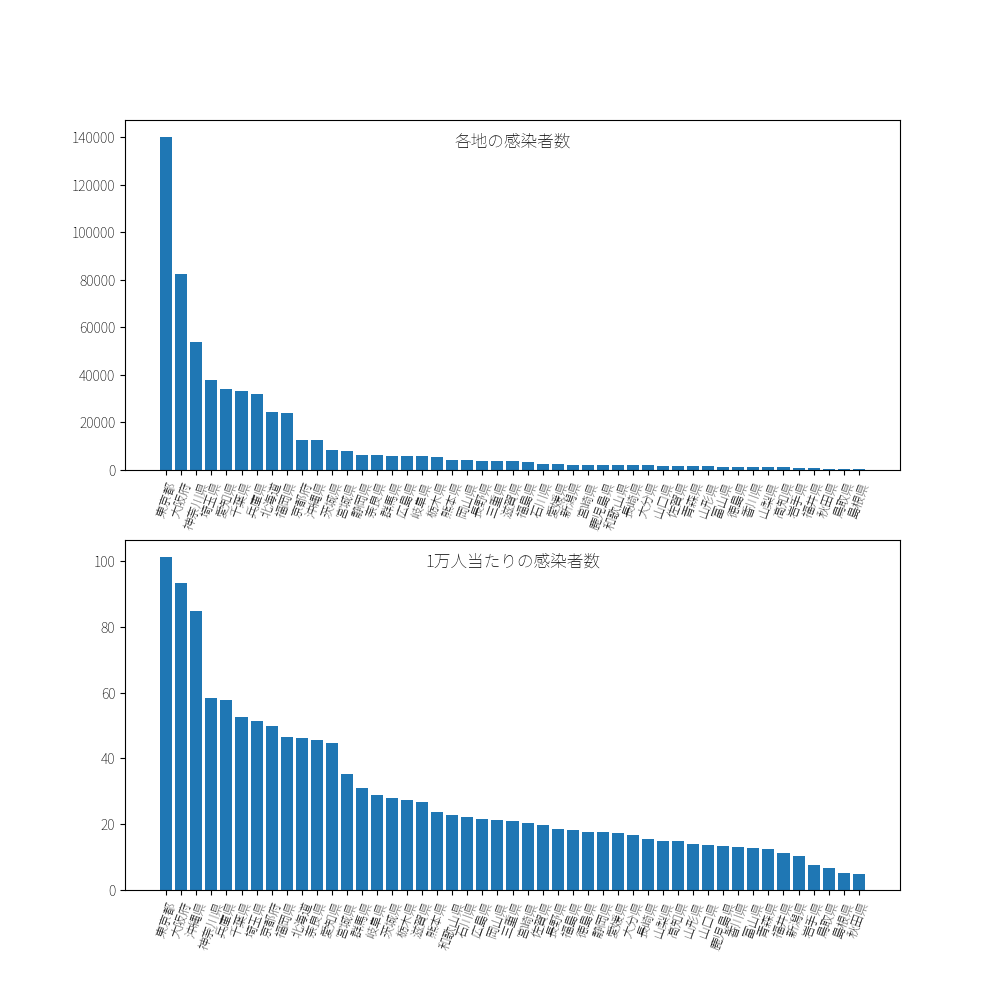

Text(0.5, 0.9, '1万人当たりの感染者数')

In [9]:
fig = plt.figure(figsize=(10,10))
plt.subplot(2,1,1) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc["都道府県名"], all_jp_desc["各地の感染者数合計"])
plt.title("各地の感染者数", y=0.9)

plt.subplot(2,1,2) # (rows, columns, panel number)
plt.xticks(rotation="70",fontsize=9)
plt.bar(all_jp_desc_10k["都道府県名"], all_jp_desc_10k["１万人当たりの感染者数"])
plt.title("1万人当たりの感染者数",y=0.9)
